**Installing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
%matplotlib inline

**Importing the Dataset**

In [ ]:
data = pd.read_csv('winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#how many rows and columns of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There we can say that there are 12 columns and 1599 rows

In [ ]:
#datatypes of all attributes in dataset
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#ststistical parameters of data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Check for the null values
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Therefore there are no null values.

In [ ]:
#count of different qualities of wine
print(data.quality.nunique(dropna=True))
data.quality.unique()

6


array([5, 6, 7, 4, 8, 3])

**Data Visualization**

**Bivariate Analysis**

No handles with labels found to put in legend.


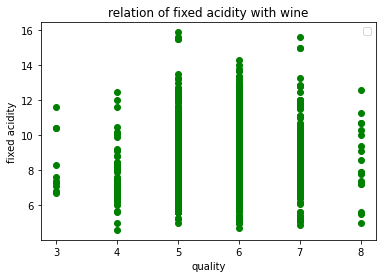

In [ ]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

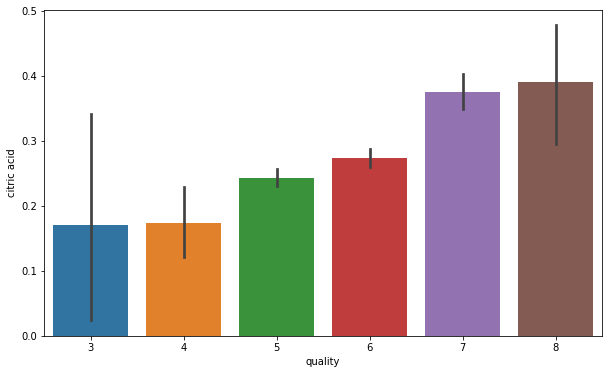

In [ ]:
# Composition of citric acid go higher as we go higher in the quality of the wine

import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

In [ ]:
#Relationship between chloride and quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

ValueError: ignored

<Figure size 720x432 with 0 Axes>

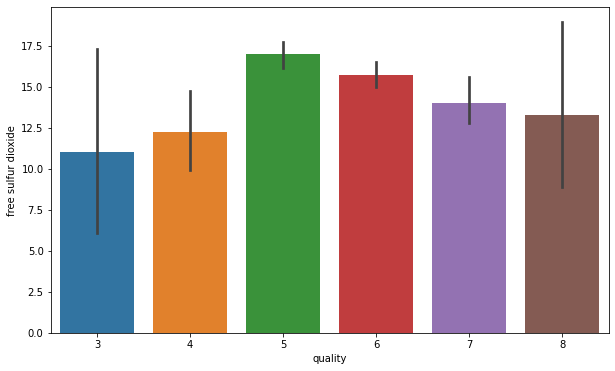

In [ ]:
#Relationship between free sulphur oxide and quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

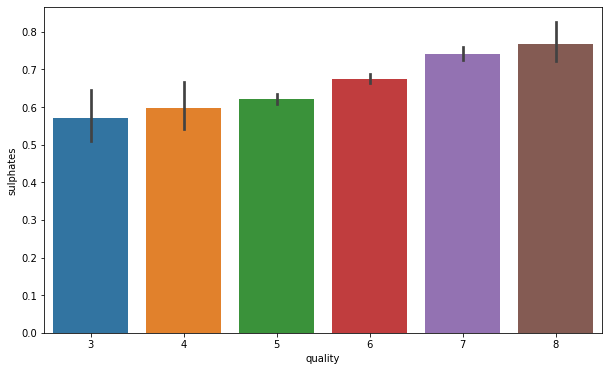

In [ ]:
#Sulphates and the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

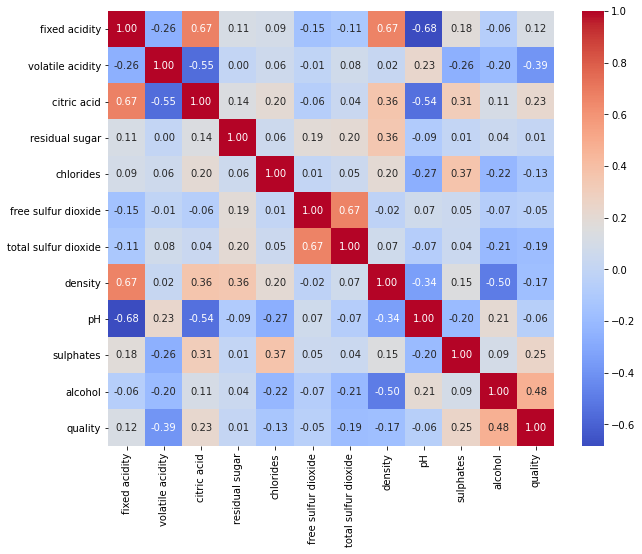

In [ ]:
#check for correlation between features and target variable
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.
For Example, 
# The strongly correlated items are :




# The weekly correlated items are :



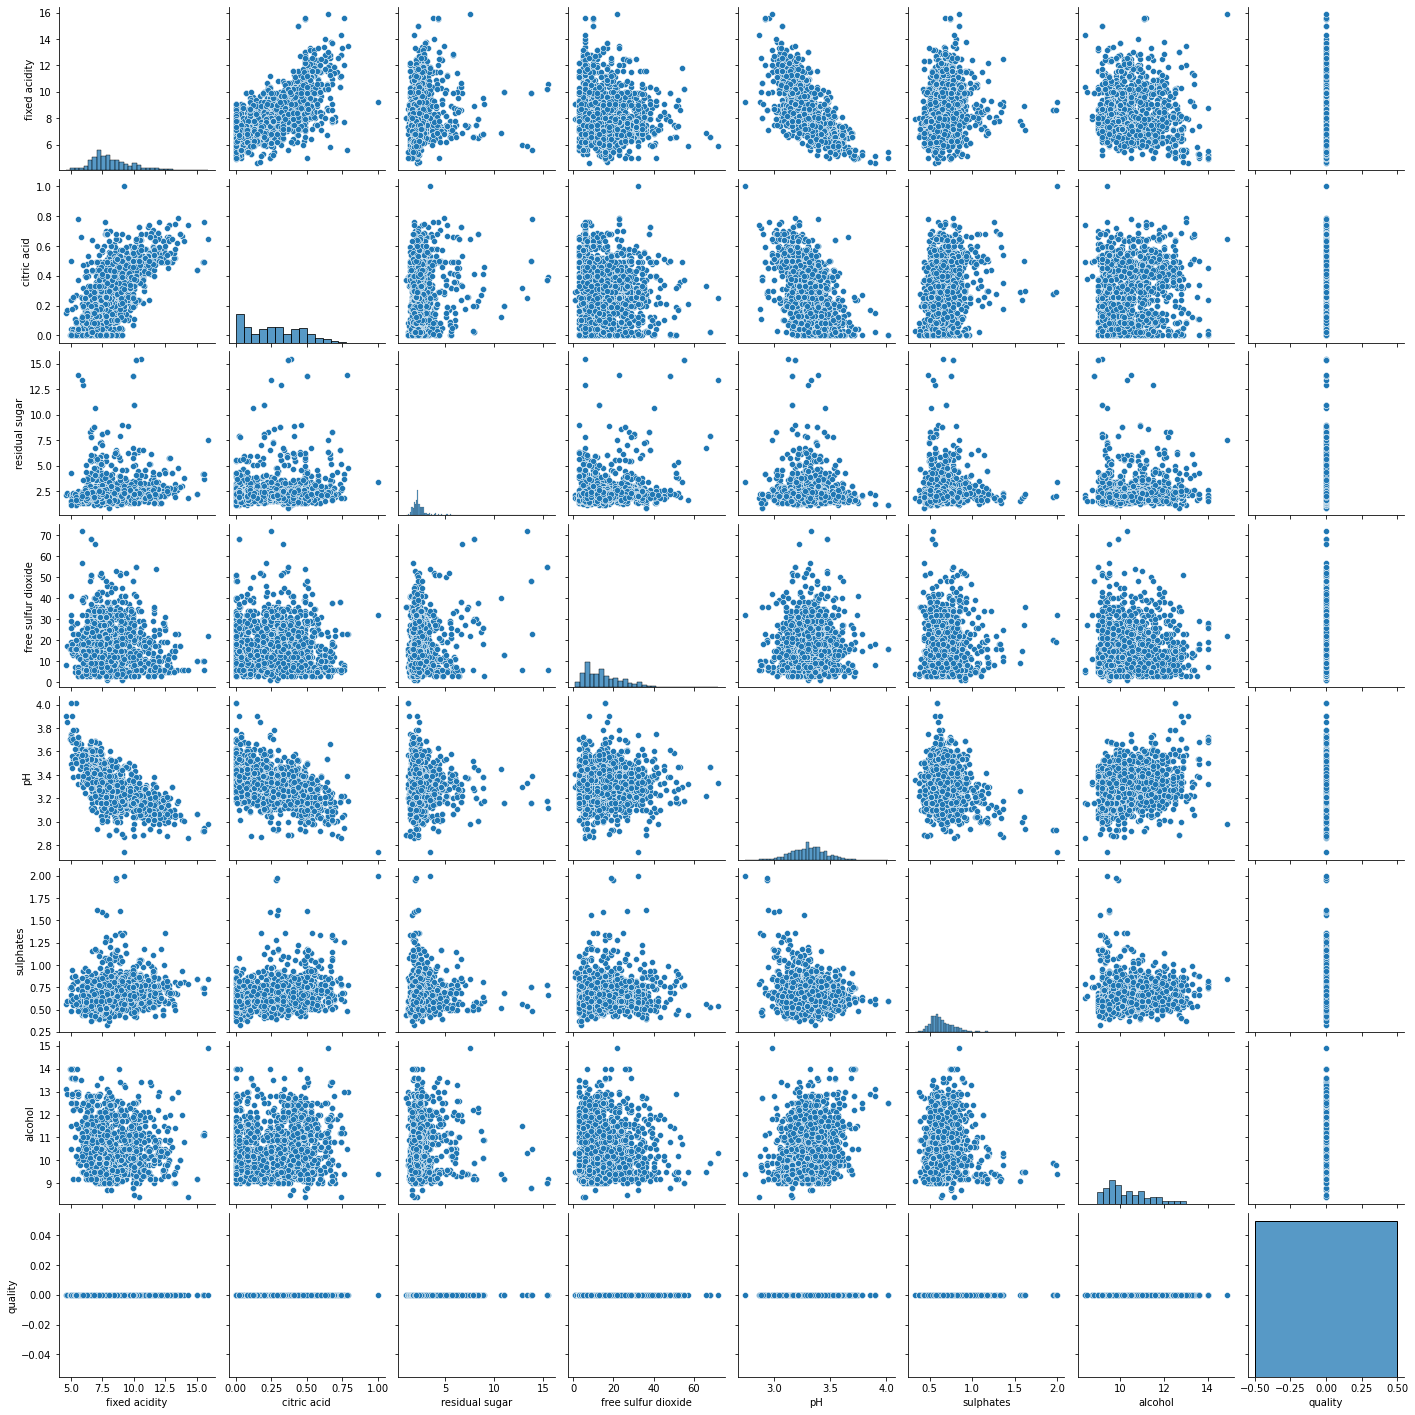

In [ ]:
#check the pairplot
sns.pairplot(data)

**Data pre-processing**

In [ ]:
# Removing Unnecassary columns from the dataset
# As we saw that volatile acidity, total sulphor dioxide, chlorides, density are very less related to the dependent variable 
#   quality so even if we remove these columns the accuracy won't be affected that much.

#data = data.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis = 1)

# checking the shape of the dataset
#print(data.shape)

In [ ]:
data.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [ ]:
# analyzing the different values present in the dependent variable(quality column)
data['quality'].value_counts()

Series([], Name: quality, dtype: int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


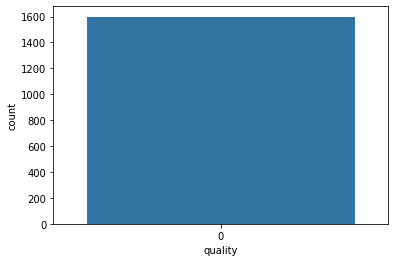

In [ ]:
sns.countplot(data['quality'])

In [ ]:
# dividing the dataset into dependent and independent variables
X = data.drop('quality', axis = 1)
Y = data['quality']

In [ ]:
# determining the shape of x and y.
X.shape, Y.shape

((1599, 11), (1599,))

In [ ]:
# dividing the dataset in training and testing set with 75-25 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
# determining the shapes of training and testing sets
X_train.shape , Y_train.shape

((1199, 11), (1199,))

In [ ]:
X_test.shape, Y_test.shape

((400, 11), (400,))

In [ ]:
# standard scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Modelling**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(X_train,Y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train,y_train))
print("Testing accuracy :", model.score(X_test,y_test))

# classification report
print(classification_report(y_pred,y_test))

# confusion matrix
print(confusion_matrix(y_pred,y_test))

ValueError: ignored

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit()

# predicting the results for the test set
y_pred = model.predict()

# calculating the training and testing accuracies
print("Training accuracy :", model.score())
print("Testing accuracy :", model.score())


TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit()

NameError: name 'grid_svc' is not defined

In [ ]:
grid_svc.best_params_

NameError: name 'grid_svc' is not defined

In [ ]:
# creating a new SVC model with these best parameters

model2 = SVC(C = , gamma = , kernel = '')
model2.fit()
y_pred = model2.predict()

print(classification_report())

SyntaxError: invalid syntax (<ipython-input-26-64731cfd4733>, line 3)

**Decision Forest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit()

# predicting the results for the test set
y_pred = model.predict()

# calculating the training and testing accuracies
print("Training accuracy :", model.score())
print("Testing accuracy :", model.score())

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# classification report
print(classification_report())

# confusion matrix
print(confusion_matrix())


TypeError: classification_report() missing 2 required positional arguments: 'y_true' and 'y_pred'

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators =)

# feeding the training set into the model
model.fit()

# predicting the results for the test set
y_pred = model.predict()

# calculating the training and testing accuracies
print("Training accuracy :", model.score())
print("Testing accuracy :", model.score())

SyntaxError: invalid syntax (<ipython-input-29-1305e4dba934>, line 4)

In [ ]:
# classification report
print(classification_report())

# confusion matrix
print(confusion_matrix())


TypeError: classification_report() missing 2 required positional arguments: 'y_true' and 'y_pred'